In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, roc_auc_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import scipy.stats as stats
# import xgboost as xgb

import random
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers, regularizers
from tensorflow.keras.models import Sequential, save_model
from tensorflow.keras.layers import LSTM, Dense, Dropout, Normalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import classification_report, confusion_matrix

from sklearn.ensemble import RandomForestClassifier
pd.set_option('display.max_columns', None)

2024-07-22 06:55:29.956359: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-07-22 06:55:31.004651: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/cuda/lib64:/usr/local/nccl2/lib:/usr/local/cuda/extras/CUPTI/lib64
2024-07-22 06:55:31.004777: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/cuda/lib64:/usr/local/nccl2/lib:/usr/loca

In [2]:
file_path = "Dataset.csv"
df = pd.read_csv(file_path, index_col = 0)
df

,Hour,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,BaseExcess,HCO3,FiO2,pH,PaCO2,SaO2,AST,BUN,Alkalinephos,Calcium,Chloride,Creatinine,Bilirubin_direct,Glucose,Lactate,Magnesium,Phosphate,Potassium,Bilirubin_total,TroponinI,Hct,Hgb,PTT,WBC,Fibrinogen,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,SepsisLabel,Patient_ID
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,68.54,0,NaN,NaN,-0.02,1,0,17072
1,1,65.0,100.0,NaN,NaN,72.0,NaN,16.5,NaN,NaN,NaN,0.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,68.54,0,NaN,NaN,-0.02,2,0,17072
2,2,78.0,100.0,NaN,NaN,42.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,68.54,0,NaN,NaN,-0.02,3,0,17072
3,3,73.0,100.0,NaN,NaN,NaN,NaN,17.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,68.54,0,NaN,NaN,-0.02,4,0,17072
4,4,70.0,100.0,NaN,129.0,74.0,69.0,14.0,NaN,NaN,26.0,0.4,NaN,NaN,NaN,NaN,23.0,NaN,9.6,104.0,0.8,NaN,161.0,NaN,1.6,2.1,3.2,NaN,NaN,29.7,9.5,30.6,11.3,NaN,330.0,68.54,0,NaN,NaN,-0.02,5,0,17072
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21,21,83.0,99.0,NaN,121.0,77.0,54.0,22.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,88.00,0,1.0,0.0,-2.93,22,0,113911
22,22,80.0,92.0,NaN,102.0,73.0,51.0,24.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,88.00,0,1.0,0.0,-2.93,23,0,113911
23,23,95.0,97.0,36.7,128.5,83.0,58.5,25.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,163.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,88.00,0,1.0,0.0,-2.93,24,0,113911
24,24,104.0,99.0,NaN,127.0,85.0,59.0,24.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,88.00,0,1.0,0.0,-2.93,25,0,113911


In [3]:
columns_for_baseline = ['Hour', 'HR','O2Sat', 'Temp','SBP', 'MAP', 'DBP', 'Resp','Age','Gender','Patient_ID','SepsisLabel']

In [4]:
columns_all_features = ['Hour', 'HR', 'O2Sat', 'Temp', 'SBP', 'MAP', 'DBP', 'Resp', 
                        'BaseExcess', 'HCO3', 'FiO2', 'pH','Creatinine', 'Bilirubin_direct',
                        'Glucose', 'Lactate','Bilirubin_total', 'WBC','Platelets', 'Age', 'Gender',
                        'SepsisLabel', 'Patient_ID']

In [5]:
df1 = df[columns_all_features]

In [6]:
# Filter patient IDs where at some point sepsis label is 1
sepsis_patients_ids = list(set(df1.loc[df1['SepsisLabel'] == 1, 'Patient_ID'].tolist()))
# Get unique Patient_IDs from df_encoded
all_patient_ids = set(df1['Patient_ID'])
# Find Patient_IDs not in sepsis_patients_ids
no_sepsis_patients_ids = list(all_patient_ids - set(sepsis_patients_ids))

In [7]:
non_sepsis_selected_patients_ids = random.sample(no_sepsis_patients_ids, 4000)

In [8]:
non_sepsis_selected_df = df1.loc[df1['Patient_ID'].isin(non_sepsis_selected_patients_ids)]
sepsis_selected_df = df1.loc[df1['Patient_ID'].isin(sepsis_patients_ids)]
final_df = pd.concat([non_sepsis_selected_df,sepsis_selected_df])

In [9]:
patient_ids = final_df['Patient_ID'].unique()
np.random.shuffle(patient_ids)

In [10]:
final_df.Patient_ID = final_df.Patient_ID.astype("category")
final_df.Patient_ID = final_df.Patient_ID.cat.set_categories(patient_ids)
final_df_shuffled = final_df.sort_values(["Patient_ID", "Hour"]).set_index('Patient_ID')  ## 'sort' changed to 'patient_ids'

In [11]:
final_df.Patient_ID = final_df.Patient_ID.astype("int")

df_filled = final_df.groupby('Patient_ID', group_keys=False).apply(
    lambda group: group.interpolate().bfill().ffill()
).reset_index(drop=False)


In [12]:
# Define normal values for each parameter
normal_values = {
    'O2Sat': 98,  # Example normal value for Oxygen Saturation
    'Temp': 37,  # Example normal value for Temperature in Celsius
    'SBP': 120,  # Example normal value for Systolic Blood Pressure
    'MAP': 93,  # Example normal value for Mean Arterial Pressure
    'DBP': 80,  # Example normal value for Diastolic Blood Pressure
    'Resp': 16,  # Example normal value for Respiratory Rate
    'BaseExcess': 0,  # Example normal value for Base Excess
    'HCO3': 24,  # Example normal value for Bicarbonate
    'FiO2': 0.21,  # Example normal value for Fraction of Inspired Oxygen
    'pH': 7.4,  # Example normal value for pH
    'Creatinine': 1.0,  # Example normal value for Creatinine
    'Bilirubin_direct': 0.3,  # Example normal value for Direct Bilirubin
    'Glucose': 90,  # Example normal value for Glucose
    'Lactate': 1.0,  # Example normal value for Lactate
    'Bilirubin_total': 1.0,  # Example normal value for Total Bilirubin
    'Platelets': 250,  # Example normal value for Platelets
    'WBC': 6,  # Example normal value for White Blood Cells
}

# Impute missing values with the normal values
df_imputed = df_filled.fillna(value=normal_values)
cleaned_df = df_imputed.dropna()

In [13]:
# List to scale
columns_to_scale = ['Hour',
 'HR',
 'O2Sat',
 'Temp',
 'SBP',
 'MAP',
 'DBP',
 'Resp',
 'BaseExcess',
 'HCO3',
 'FiO2',
 'pH',
 'Creatinine',
 'Bilirubin_direct',
 'Glucose',
 'Lactate',
 'Bilirubin_total',
 'WBC',
 'Platelets',
 'Age',
 'Gender']

# Initialize the scalers
min_max_scaler = MinMaxScaler()
standard_scaler = StandardScaler()

# Apply MinMaxScaler to the O2Sat column
cleaned_df['O2Sat'] = min_max_scaler.fit_transform(cleaned_df[['O2Sat']])

# Apply StandardScaler to the rest of the columns
columns_to_standardize = [col for col in columns_to_scale if col != 'O2Sat']
cleaned_df[columns_to_standardize] = standard_scaler.fit_transform(cleaned_df[columns_to_standardize])

/var/tmp/ipykernel_8963/63928299.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df['O2Sat'] = min_max_scaler.fit_transform(cleaned_df[['O2Sat']])
/var/tmp/ipykernel_8963/63928299.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df[columns_to_standardize] = standard_scaler.fit_transform(cleaned_df[columns_to_standardize])


In [15]:
cleaned_df

,index,Hour,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,BaseExcess,HCO3,FiO2,pH,Creatinine,Bilirubin_direct,Glucose,Lactate,Bilirubin_total,WBC,Platelets,Age,Gender,SepsisLabel,Patient_ID
0,0,-0.878635,1.702707,0.98750,-1.245076,-0.321927,0.903452,1.077352,0.162924,-2.444245,-0.394232,0.933272,-4.185395,-0.288830,-0.132263,-0.210686,1.855469,-0.157142,-0.353665,-1.329667,-2.101528,0.858561,0,9
1,0,-0.878635,-0.233458,1.00000,-1.900588,-0.491189,-0.176952,-0.200014,-0.910923,-0.026201,-0.394232,0.933272,0.362302,-0.348885,-0.132263,-0.367669,-0.316144,-0.157142,-0.379336,-0.844537,0.913893,-1.164740,0,10
2,0,-0.878635,-0.288777,1.00000,1.376976,0.545541,0.471290,0.367704,-1.179385,-0.026201,-0.547694,0.310172,0.867602,-0.288830,-0.132263,-0.188260,0.639365,-0.157142,0.108416,0.201823,0.238992,0.858561,0,11
3,0,-0.878635,1.315474,0.97500,0.944337,0.016597,-0.269558,1.006388,-0.552974,-0.026201,-0.701156,-0.297351,0.025436,-0.348885,-0.132263,-0.995600,-0.403009,-0.157142,-0.559034,-0.730388,1.218587,0.858561,0,12
4,0,-0.878635,-0.067501,0.97500,-1.113973,-0.279611,0.471290,0.580599,-1.447847,-2.444245,-1.928851,-0.001378,-1.153597,1.693009,-0.132263,3.870867,0.031314,-0.157142,0.121252,-0.730388,-0.209087,-1.164740,0,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
321350,334,6.232718,-0.952605,1.00000,-1.520391,-1.422131,-1.380830,1.290247,-1.447847,1.700973,1.140387,-0.297351,0.025436,0.191616,-0.132263,-1.758087,-0.750467,-0.472285,0.108416,2.018684,-0.717117,0.858561,1,18469
321351,334,6.232718,1.730367,0.93750,0.197053,-0.068034,0.810846,1.077352,1.684208,-1.200680,-0.087308,-0.001378,1.204468,-0.378913,-0.132263,-0.233112,-0.020805,-0.157142,-1.290663,-1.548451,-0.489678,0.858561,1,101922
321352,334,6.232718,-0.786648,0.95625,-0.851768,-0.533505,-1.226486,-1.299969,3.921390,-2.098810,-1.253619,0.154397,-2.501063,-0.240785,15.080128,0.170558,0.187670,13.814211,0.377964,-1.405766,0.684600,0.858561,1,111353
321353,335,6.254009,-1.173881,1.00000,-1.467950,-1.549077,-1.380830,1.290247,-1.626821,1.700973,1.140387,-0.297351,0.025436,0.191616,-0.132263,-1.758087,-0.750467,-0.472285,0.108416,2.018684,-0.717117,0.858561,1,18469


In [14]:
# Prepare data for LSTM
features = columns_to_scale
X = cleaned_df[features]
y = cleaned_df['SepsisLabel']

In [15]:
def create_sequences(X, y, time_steps=6):
    X_seq, y_seq = [], []
    for i in range(len(X) - time_steps):
        X_seq.append(X.iloc[i:(i + time_steps)].values)
        y_seq.append(y.iloc[i + time_steps])
    return X_seq, y_seq

In [16]:
X_sequences = []
y_sequences = []

for patient in cleaned_df.sort_values(["Patient_ID", "Hour"]).groupby("Patient_ID"):
    X = patient[1][features]
    y = patient[1]['SepsisLabel']
    X_s, y_s = create_sequences(X,y)
    
    X_sequences = X_sequences + X_s
    y_sequences = y_sequences + y_s

In [17]:
X_sequences, y_sequences = np.array(X_sequences), np.array(y_sequences)

In [18]:
split_point = int(0.8 * len(y_sequences))

In [19]:
X_train = X_sequences[:split_point,:,:]
X_test = X_sequences[split_point:,:,:]
y_train = y_sequences[:split_point]
y_test = y_sequences[split_point:]

In [94]:
y_train

array([0, 0, 0, ..., 0, 0, 0])

In [20]:
zero_indexes = np.where(y_train == 0)[0]
one_indexes = np.where(y_train == 1)[0]

zero_sample_indexes = np.random.choice(zero_indexes, size = 16000, replace = False)
balanced_indexes = np.random.choice(np.concatenate([zero_sample_indexes, one_indexes]), size = 32000, replace=False)

In [21]:
X_train_balanced = X_train[balanced_indexes,:,:] 
y_train_balanced = y_train[balanced_indexes]

In [105]:
from tensorflow.keras import models, layers, optimizers, regularizers
from tensorflow.keras.layers import Normalization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.metrics import Recall
from sklearn.model_selection import train_test_split

def init_model(X_train, y_train):
    initial_learning_rate = 0.001 # Default Adam

    adam = optimizers.Adam()
    reg_l2 = regularizers.L2(0.05)
    normalizer = Normalization()
    normalizer.adapt(X_train)
    
    model = models.Sequential()
    model.add(normalizer)
    model.add(layers.LSTM(400, activation='tanh', return_sequences=True))
    model.add(layers.LSTM(100, activation='tanh', return_sequences=True))
    model.add(layers.LSTM(128, activation='tanh', return_sequences=True))
    model.add(layers.LSTM(64, activation='tanh', return_sequences=True))
    model.add(layers.LSTM(50, activation='tanh', return_sequences=False))
    model.add(layers.Dropout(0.3))
    model.add(layers.Dense(100, activation='relu'))
    model.add(layers.Dropout(0.3))
    model.add(layers.Dense(50, activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer=adam, metrics=["accuracy", Recall()])
    return model


model_f = init_model(X_train_balanced, y_train_balanced)

In [106]:
es = EarlyStopping(monitor=Recall(), patience=50, mode="max", restore_best_weights=True)
history_fed = model_f.fit(X_train_balanced, y_train_balanced,
                          validation_split=0.2,
                          shuffle=False,
                          batch_size=64,
                          epochs=5,
                          callbacks=[es],
                          verbose=1)

Epoch 1/5
400/400 [==============================] - 31s 64ms/step - loss: 0.6606 - accuracy: 0.6154 - recall_6: 0.7745 - val_loss: 0.6513 - val_accuracy: 0.6222 - val_recall_6: 0.6964
Epoch 2/5
400/400 [==============================] - 24s 61ms/step - loss: 0.6428 - accuracy: 0.6432 - recall_6: 0.7832 - val_loss: 0.6429 - val_accuracy: 0.6402 - val_recall_6: 0.7267
Epoch 3/5
400/400 [==============================] - 25s 62ms/step - loss: 0.6244 - accuracy: 0.6612 - recall_6: 0.7853 - val_loss: 0.6402 - val_accuracy: 0.6427 - val_recall_6: 0.6624
Epoch 4/5
400/400 [==============================] - 25s 62ms/step - loss: 0.5999 - accuracy: 0.6857 - recall_6: 0.7963 - val_loss: 0.6251 - val_accuracy: 0.6675 - val_recall_6: 0.6933
Epoch 5/5
400/400 [==============================] - 25s 63ms/step - loss: 0.5599 - accuracy: 0.7178 - recall_6: 0.8154 - val_loss: 0.5970 - val_accuracy: 0.6950 - val_recall_6: 0.7083


In [107]:
y_pred = model_f.predict(X_test)
y_pred_classes = (y_pred > 0.5).astype(int)

# Calculate additional metrics
print(classification_report(y_test, y_pred_classes))
print(confusion_matrix(y_test, y_pred_classes))

1740/1740 [==============================] - 29s 16ms/step
              precision    recall  f1-score   support

           0       0.95      0.71      0.81     51525
           1       0.13      0.52      0.20      4155

    accuracy                           0.69     55680
   macro avg       0.54      0.62      0.51     55680
weighted avg       0.89      0.69      0.76     55680

[[36399 15126]
 [ 1979  2176]]


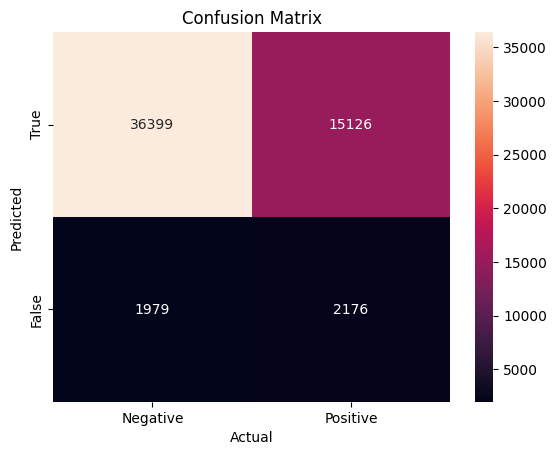

In [108]:
cm = confusion_matrix(y_test, y_pred_classes)
sns.heatmap(cm, annot=True, fmt='d', xticklabels=['Negative', 'Positive'], 
            yticklabels=['True', 'False'])
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

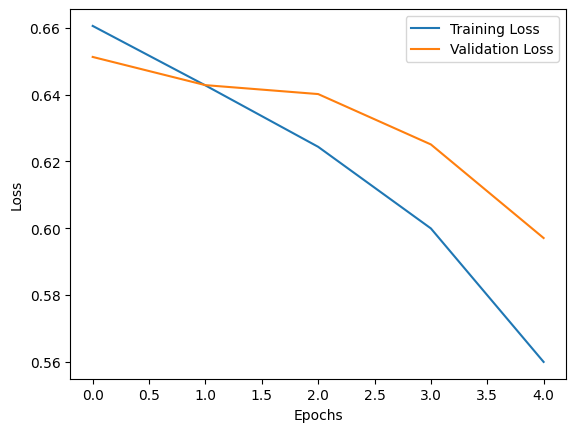

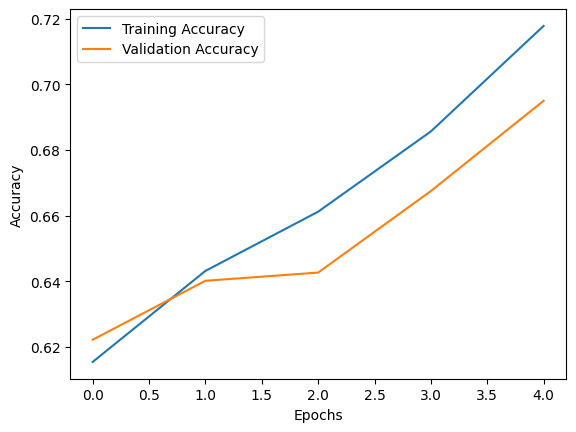

In [109]:
import matplotlib.pyplot as plt

plt.plot(history_fed.history['loss'], label='Training Loss')
plt.plot(history_fed.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(history_fed.history['accuracy'], label='Training Accuracy')
plt.plot(history_fed.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [110]:
import os
# Create a 'models' directory if it doesn't exist
os.makedirs('models', exist_ok=True)
# Save the model
#save_model(model, 'models/sepsis_model2.h5')

In [111]:
model_f.save("models/sepsis_model_allfeatures5epoc.keras")

# Adjusted model

In [22]:
from tensorflow.keras import models, layers, optimizers, regularizers
from tensorflow.keras.layers import Normalization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.metrics import Recall, Precision
from sklearn.utils import class_weight
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

def init_model(X_train):
    initial_learning_rate = 0.001 # Default Adam

    adam = optimizers.Adam()
    reg_l2 = regularizers.L2(0.05)
    normalizer = Normalization()
    normalizer.adapt(X_train)
    
    model = models.Sequential()
    model.add(normalizer)
    model.add(layers.LSTM(400, activation='tanh', return_sequences=True))
    model.add(layers.LSTM(100, activation='tanh', return_sequences=True))
    model.add(layers.LSTM(128, activation='tanh', return_sequences=True))
    model.add(layers.LSTM(64, activation='tanh', return_sequences=True))
    model.add(layers.LSTM(50, activation='tanh', return_sequences=False))
    model.add(layers.Dropout(0.3))
    model.add(layers.Dense(100, activation='relu'))
    model.add(layers.Dropout(0.3))
    model.add(layers.Dense(50, activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer=adam, metrics=["accuracy", Recall(), Precision()])
    return model

# Calculate class weights
class_weights = class_weight.compute_class_weight('balanced', classes=np.unique(y_train_balanced), y=y_train_balanced)
class_weights = {i: class_weights[i] for i in range(len(class_weights))}

model_adj2 = init_model(X_train_balanced)

es = EarlyStopping(monitor='val_recall', patience=25, mode="max", restore_best_weights=True)
history_fed = model_adj2.fit(X_train_balanced, y_train_balanced,
                          validation_split=0.2,
                          shuffle=False,
                          batch_size=64,
                          epochs=150,
                          callbacks=[es],
                          class_weight=class_weights,
                          verbose=1)

y_pred = model_adj2.predict(X_test)
y_pred_classes = (y_pred > 0.5).astype(int)

# Calculate additional metrics
print(classification_report(y_test, y_pred_classes))
print(confusion_matrix(y_test, y_pred_classes))


2024-07-22 06:58:27.405047: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/cuda/lib64:/usr/local/nccl2/lib:/usr/local/cuda/extras/CUPTI/lib64
2024-07-22 06:58:27.405088: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2024-07-22 06:58:27.405118: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (instance-20240721-162841): /proc/driver/nvidia/version does not exist
2024-07-22 06:58:27.406916: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow 

Epoch 1/150
400/400 [==============================] - 31s 65ms/step - loss: 0.6634 - accuracy: 0.6122 - recall: 0.6456 - precision: 0.6549 - val_loss: 0.6522 - val_accuracy: 0.6411 - val_recall: 0.6761 - val_precision: 0.6903
Epoch 2/150
400/400 [==============================] - 24s 60ms/step - loss: 0.6428 - accuracy: 0.6479 - recall: 0.7206 - precision: 0.6723 - val_loss: 0.6370 - val_accuracy: 0.6550 - val_recall: 0.7436 - val_precision: 0.6821
Epoch 3/150
400/400 [==============================] - 24s 60ms/step - loss: 0.6233 - accuracy: 0.6681 - recall: 0.7566 - precision: 0.6830 - val_loss: 0.6282 - val_accuracy: 0.6769 - val_recall: 0.7774 - val_precision: 0.6944
Epoch 4/150
400/400 [==============================] - 29s 73ms/step - loss: 0.5977 - accuracy: 0.6928 - recall: 0.7736 - precision: 0.7048 - val_loss: 0.5987 - val_accuracy: 0.6956 - val_recall: 0.7851 - val_precision: 0.7123
Epoch 5/150
400/400 [==============================] - 27s 67ms/step - loss: 0.5531 - accura

In [ ]:
y_pred = model_adj2.predict(X_test)


1541/1749 [=========================>....] - ETA: 4s

In [36]:
y_pred_classes = (y_pred > 0.3).astype(int)

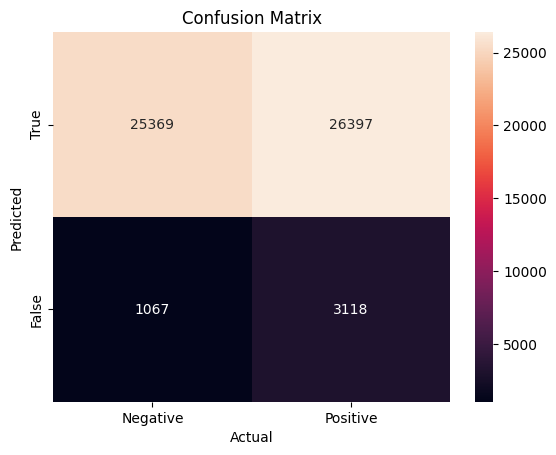

In [37]:
cm = confusion_matrix(y_test, y_pred_classes)
sns.heatmap(cm, annot=True, fmt='d', xticklabels=['Negative', 'Positive'], 
            yticklabels=['True', 'False'])
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

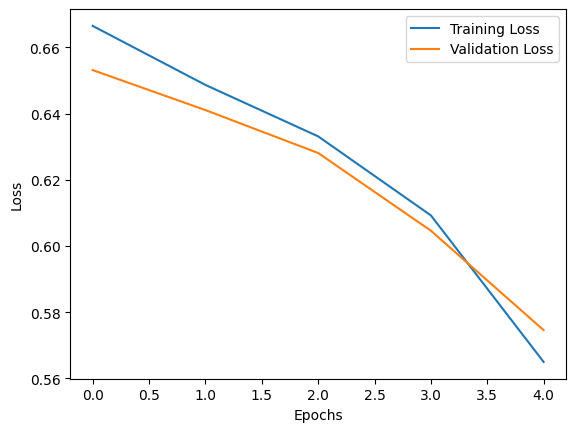

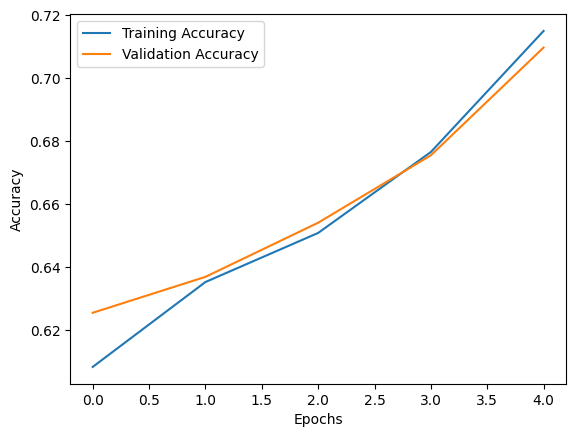

In [26]:
import matplotlib.pyplot as plt

plt.plot(history_fed.history['loss'], label='Training Loss')
plt.plot(history_fed.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(history_fed.history['accuracy'], label='Training Accuracy')
plt.plot(history_fed.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
import os
# Create a 'models' directory if it doesn't exist
os.makedirs('models', exist_ok=True)
# Save the model
#save_model(model, 'models/sepsis_model2.h5')

In [ ]:
model_adj1.save("models/sepsis_model_adj15epoc.keras")